## Instructions:
1. Rename this file with your roll number in the placeholder (e.g., MT24003_a1.py).
2. Extract the provided data.zip folder next to this file.
3. Do NOT install or import any additional libraries.
4. Complete only the sections marked with `# YOUR CODE HERE`.

## Library Imports

In [ ]:
# Allowed imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
import random
import time

ModuleNotFoundError: No module named 'numpy'

## Random Number Generator
Generate pseudo-random numbers using a custom implementation. This function must generate random numbers WITHOUT using Python's `random` module or `np.random`. Instead, a deterministic pseudo-random process should be implemented using arithmetic operations and an optional seed for reproducibility.

### Code

In [ ]:
def generate_random_numbers(
    shape,
    distribution="uniform",
    seed=None,
    burn_in=100
):
    """
    Generate random numbers using:
    - Custom Linear Congruential Generator (LCG)
    - Box–Muller Transform for Gaussian distribution
    """

    import math
    import time

    #
    # Seed initialization
    #
    if seed is None:
        seed = int(time.time()) % (2**31)

    #
    # Custom LCG parameters
    #
    a = 1664525
    c = 1013904223
    m = 2**32
    current_seed = seed

    def lcg():
        nonlocal current_seed
        current_seed = (a * current_seed + c) % m
        return current_seed / m   # Uniform in [0,1)

    #
    # Burn-in phase (reduces correlation)
    #
    for _ in range(burn_in):
        lcg()

    #
    # Uniform generator
    #
    def generate_uniform():
        return lcg()

    #
    # Gaussian generator (Box–Muller)
    #
    def generate_gaussian():
        u1 = generate_uniform()
        u2 = generate_uniform()
        z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        return z   # Mean 0, Std Dev 1

    #
    # Handle shape input
    #
    if isinstance(shape, int):
        total = shape
    else:
        total = 1
        for dim in shape:
            total *= dim

    #
    # Generate samples
    #
    if distribution == "uniform":
        numbers = [generate_uniform() for _ in range(total)]
    elif distribution == "gaussian":
        numbers = [generate_gaussian() for _ in range(total)]
    else:
        raise ValueError("distribution must be 'uniform' or 'gaussian'")

    return numbers


### Visualize and Plot

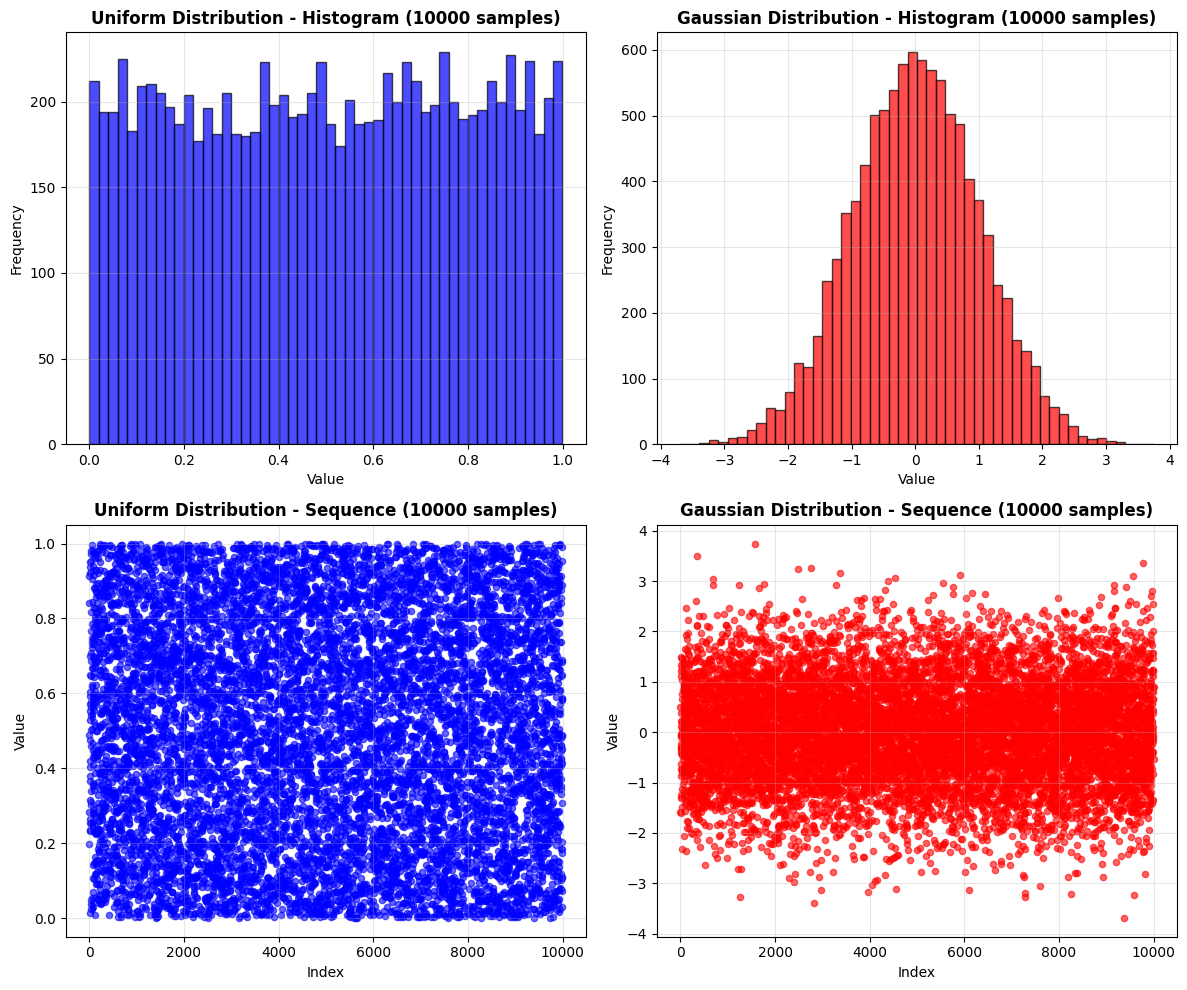

UNIFORM DISTRIBUTION STATISTICS
Mean: 0.5039
Std Dev: 0.2906
Min: 0.0003
Max: 0.9999
Samples: 10000


GAUSSIAN DISTRIBUTION STATISTICS
Mean: 0.0066
Std Dev: 0.9986
Min: -3.6901
Max: 3.7462
Samples: 10000


Example use in ML:- A random number generator is crucial for initializing model parameters like of weights in neural networks in a way. for debugging and model comparison seed is fixed which is essential for these.


In [ ]:
# Generate random numbers with seed for reproducibility
uniform_numbers = generate_random_numbers(shape=10000, distribution="uniform", seed=42)
gaussian_numbers = generate_random_numbers(shape=10000, distribution="gaussian", seed=42)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Uniform distribution histogram
axes[0, 0].hist(uniform_numbers, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Uniform Distribution - Histogram (10000 samples)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Gaussian distribution histogram
axes[0, 1].hist(gaussian_numbers, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Gaussian Distribution - Histogram (10000 samples)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Uniform distribution scatter plot
axes[1, 0].scatter(range(len(uniform_numbers)), uniform_numbers, alpha=0.6, s=20, color='blue')
axes[1, 0].set_title('Uniform Distribution - Sequence (10000 samples)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Gaussian distribution scatter plot
axes[1, 1].scatter(range(len(gaussian_numbers)), gaussian_numbers, alpha=0.6, s=20, color='red')
axes[1, 1].set_title('Gaussian Distribution - Sequence (10000 samples)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("=" * 50)
print("UNIFORM DISTRIBUTION STATISTICS")
print("=" * 50)
print(f"Mean: {np.mean(uniform_numbers):.4f}")
print(f"Std Dev: {np.std(uniform_numbers):.4f}")
print(f"Min: {np.min(uniform_numbers):.4f}")
print(f"Max: {np.max(uniform_numbers):.4f}")
print(f"Samples: {len(uniform_numbers)}")

print("\n" )
print("GAUSSIAN DISTRIBUTION STATISTICS")

print(f"Mean: {np.mean(gaussian_numbers):.4f}")
print(f"Std Dev: {np.std(gaussian_numbers):.4f}")
print(f"Min: {np.min(gaussian_numbers):.4f}")
print(f"Max: {np.max(gaussian_numbers):.4f}")
print(f"Samples: {len(gaussian_numbers)}")

print("\n" )
print("Example use in ML:- A random number generator is crucial for initializing model parameters like of weights in neural networks in a way. for debugging and model comparison seed is fixed which is essential for these.")

## Image Loader

In [ ]:
def load_image(path_to_image_file):
    """
    Load an image from disk and return it as an RGB NumPy array.

    This function must:
    1. Read the image from disk
    2. Ensure the image has exactly 3 channels
    3. Convert the channel order to RGB

    Args:
        path_to_image_file (str): Path to the image file.

    Returns:
        np.ndarray:
            Image array of shape (H, W, 3) in RGB format.
    """
    # YOUR CODE HERE
    # Read image using cv2 (OpenCV)
    image = cv2.imread(path_to_image_file)
    
    # Check if image was loaded successfully
    if image is None:
        raise ValueError(f"Could not load image from path: {path_to_image_file}")
    
    # cv2.imread reads images in BGR format, convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Ensure the image has exactly 3 channels
    if len(image_rgb.shape) != 3 or image_rgb.shape[2] != 3:
        raise ValueError(f"Image must have 3 channels, but has shape {image_rgb.shape}")
    
    return image_rgb

## Image Functions

In [ ]:
def inspect_image(image):
    """
    Inspect numerical and memory properties of an image array.

    Args:
        image (np.ndarray): Input image array.

    Returns:
        dict with keys:
        - shape
        - dtype
        - min
        - max
        - KB
        - MB
    """
    # YOUR CODE HERE
    info = {
        'shape': image.shape,
        'dtype': str(image.dtype),
        'min': float(np.min(image)),
        'max': float(np.max(image)),
        'KB': image.nbytes / 1024,
        'MB': image.nbytes / (1024 * 1024)
    }
    return info

In [ ]:
def min_max_normalize(image):
    """
    Apply min-max normalization to an image.

    Args:
        image (np.ndarray): Input image.

    Returns:
        np.ndarray: Normalized image with values in [0, 1].
    """
    # YOUR CODE HERE
    img_min = np.min(image)
    img_max = np.max(image)
    
    if img_max == img_min:
        # If all values are the same, return zeros
        return np.zeros_like(image, dtype=np.float32)
    
    normalized = (image.astype(np.float32) - img_min) / (img_max - img_min)
    return normalized

In [ ]:
def standardize(image, mean=0, std=1):
    """
    Standardize image pixel values using a specified mean and standard deviation.

    Args:
        image (np.ndarray): Input image.
        mean (float): Desired mean of the standardized output.
        std (float): Desired standard deviation of the standardized output.

    Returns:
        np.ndarray: Standardized image array.
    """
    # YOUR CODE HERE
    # Convert to float
    image_float = image.astype(np.float32)
    
    # Compute current mean and std
    current_mean = np.mean(image_float)
    current_std = np.std(image_float)
    
    # Avoid division by zero
    if current_std == 0:
        standardized = image_float - current_mean + mean
    else:
        # Standardize to zero mean and unit variance first
        standardized = (image_float - current_mean) / current_std
        # Then scale to desired mean and std
        standardized = standardized * std + mean
    
    return standardized

In [ ]:
def crop_image(image, top, left, height, width):
    """
    Crop a rectangular region from an image using NumPy slicing.

    This function should return a view (not a copy) of the original image
    whenever possible, demonstrating how NumPy handles memory efficiently.

    Args:
        image (np.ndarray):
            Input image.
        top, left (int):
            Top-left corner of the crop.
        height, width (int):
            Size of the cropped region.

    Returns:
        np.ndarray:
            Cropped image.
    """
    # YOUR CODE HERE
    # Use NumPy slicing to create a view
    cropped = image[top:top+height, left:left+width]
    return cropped

In [ ]:
def resize_with_padding(image, target_size=(224, 224)):
    """
    Resize an image to a fixed target size while preserving aspect ratio.

    The image should be resized such that its aspect ratio is preserved.
    Any remaining area should be padded with zeros (black pixels) to
    achieve the target size.

    This function must work for both:
    - Color images of shape (H, W, 3)
    - Grayscale images of shape (H, W)

    Args:
        image (np.ndarray): Input image as a NumPy array.
        target_size (tuple): Desired output size as (height, width).
            Default is (224, 224).

    Returns:
        np.ndarray: Resized image of shape:
            - (224, 224, 3) for color images
            - (224, 224) for grayscale images
    """
    # YOUR CODE HERE
    target_h, target_w = target_size
    
    # Check if grayscale or color
    if len(image.shape) == 2:
        # Grayscale image
        is_grayscale = True
        h, w = image.shape
    else:
        # Color image
        is_grayscale = False
        h, w, c = image.shape
    
    # Calculate scaling factor to fit the image while preserving aspect ratio
    scale = min(target_h / h, target_w / w)
    
    # Calculate new dimensions
    new_h = int(h * scale)
    new_w = int(w * scale)
    
    # Resize using cv2
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    
    # Create output array with target size
    if is_grayscale:
        output = np.zeros((target_h, target_w), dtype=image.dtype)
        # Calculate padding
        pad_h = (target_h - new_h) // 2
        pad_w = (target_w - new_w) // 2
        # Place resized image in the center
        output[pad_h:pad_h+new_h, pad_w:pad_w+new_w] = resized
    else:
        output = np.zeros((target_h, target_w, c), dtype=image.dtype)
        # Calculate padding
        pad_h = (target_h - new_h) // 2
        pad_w = (target_w - new_w) // 2
        # Place resized image in the center
        output[pad_h:pad_h+new_h, pad_w:pad_w+new_w, :] = resized
    
    return output

In [ ]:
def extract_rgb_channels(image):
    """Extract R, G, B channels."""
    # YOUR CODE HERE
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Image must be a color image with 3 channels")
    
    r_channel = image[:, :, 0]
    g_channel = image[:, :, 1]
    b_channel = image[:, :, 2]
    
    return r_channel, g_channel, b_channel

In [ ]:
def rgb_to_grayscale(image):
    """
    Convert RGB image to grayscale and normalize pixel values to [0, 1].
    """
    # YOUR CODE HERE
    # Use standard RGB to grayscale conversion formula
    # grayscale = 0.299*R + 0.587*G + 0.114*B
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Image must be a color image with 3 channels")
    
    grayscale = (0.299 * image[:, :, 0] + 
                 0.587 * image[:, :, 1] + 
                 0.114 * image[:, :, 2])
    
    # Normalize to [0, 1]
    grayscale = grayscale / 255.0
    
    return grayscale

In [ ]:
def add_gaussian_noise(image, mean=0.0, std=0.05):
    """Add Gaussian noise using NumPy."""
    # YOUR CODE HERE
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    # Clip values to valid range
    if image.dtype == np.uint8:
        noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    else:
        noisy_image = np.clip(noisy_image, 0, 1).astype(image.dtype)
    
    return noisy_image

In [ ]:
def compute_image_histogram(image, num_bins=256):
    """
    Compute the histogram of pixel intensity values for an image.

    This function should support both grayscale and color images:
    - For grayscale images of shape (H, W), compute a single histogram.
    - For color images of shape (H, W, 3), compute separate histograms
      for each channel (R, G, B).

    The histogram represents the frequency of pixel values in each bin.

    Args:
        image (np.ndarray): Input image array. Can be grayscale (H, W)
            or color (H, W, 3).
        num_bins (int): Number of bins to use for the histogram.
            Default is 256.

    Returns:
        np.ndarray:
            - Shape (num_bins,) for grayscale images
            - Shape (3, num_bins) for color images, where each row
              corresponds to one color channel (R, G, B)
    """
    # YOUR CODE HERE
    if len(image.shape) == 2:
        # Grayscale image
        hist, _ = np.histogram(image.flatten(), bins=num_bins, range=(0, 256))
        return hist.astype(np.float32)
    elif len(image.shape) == 3 and image.shape[2] == 3:
        # Color image - compute histogram for each channel
        histograms = []
        for i in range(3):
            hist, _ = np.histogram(image[:, :, i].flatten(), bins=num_bins, range=(0, 256))
            histograms.append(hist)
        return np.array(histograms, dtype=np.float32)
    else:
        raise ValueError("Image must be grayscale (H, W) or color (H, W, 3)")

### Image functions visualization and plotting
Create plots of all the operations that you did before in a single plot through the code block below.

IMAGE INSPECTION
Image properties: {'shape': (300, 293, 3), 'dtype': 'uint8', 'min': 16.0, 'max': 255.0, 'KB': 257.51953125, 'MB': 0.2514839172363281}


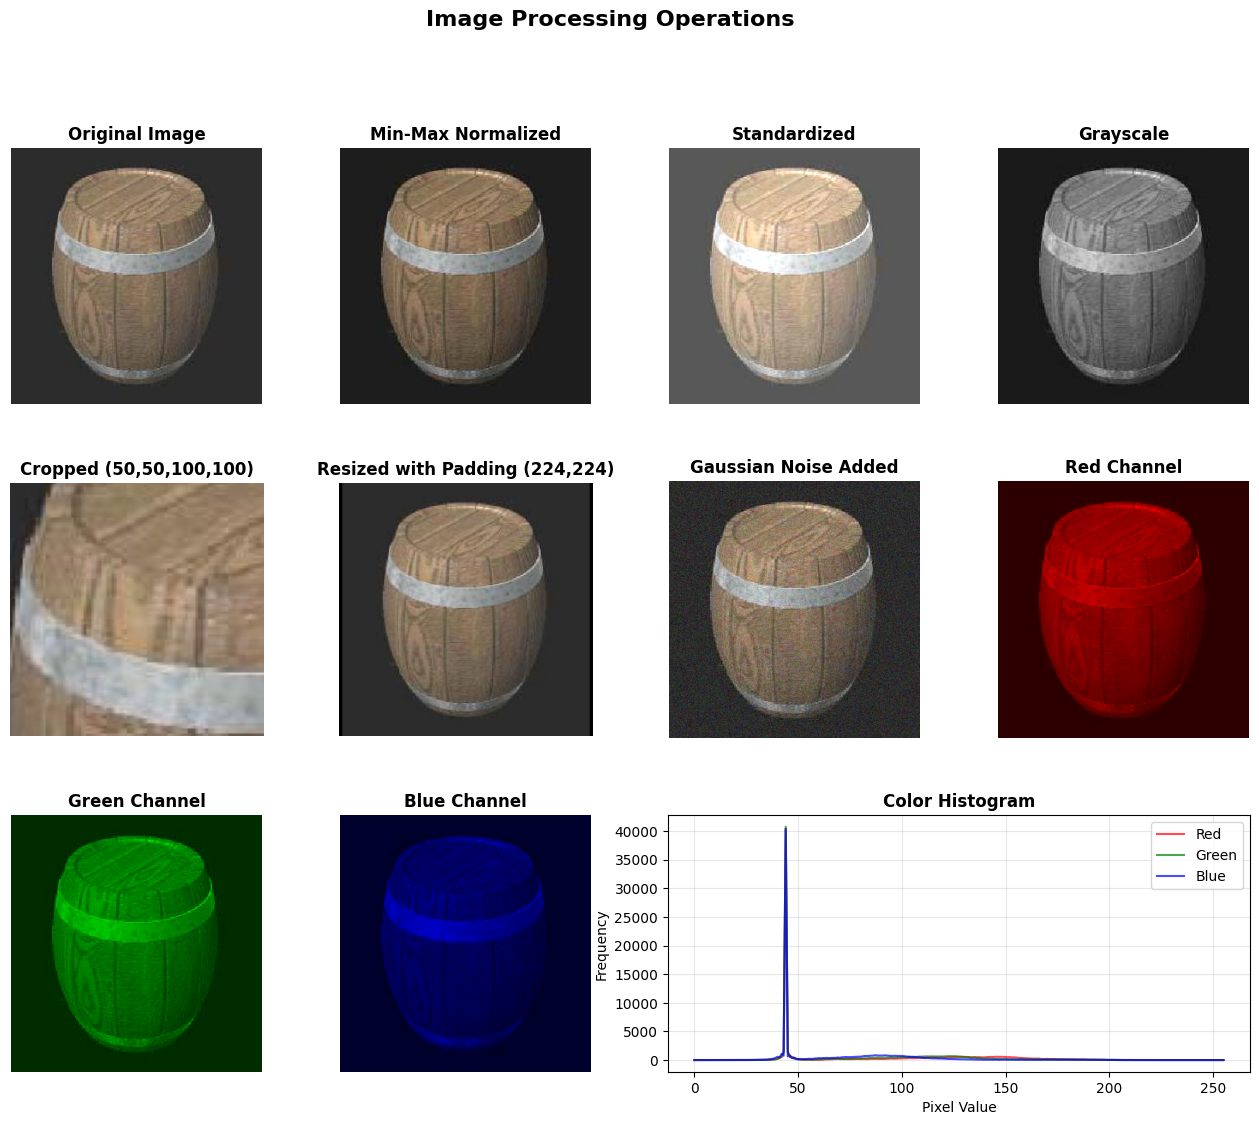

IMAGE OPERATIONS COMPLETED SUCCESSFULLY


In [ ]:
# YOUR CODE HERE
# Load image
image_path = 'image_0005.jpg' # barrel image from dataset
original_image = load_image(image_path)


print("IMAGE INSPECTION")

print(f"Image properties: {inspect_image(original_image)}")

# Perform various operations
normalized_image = min_max_normalize(original_image)
standardized_image = standardize(original_image, mean=127.5, std=50)
cropped_image = crop_image(original_image, top=50, left=50, height=100, width=100)
resized_image = resize_with_padding(original_image, target_size=(224, 224))
grayscale_image = rgb_to_grayscale(original_image)
noisy_image = add_gaussian_noise(original_image.astype(np.float32) / 255.0, mean=0.0, std=0.05)
noisy_image = (noisy_image * 255).astype(np.uint8)

# Extract channels
r_channel, g_channel, b_channel = extract_rgb_channels(original_image)

# Compute histogram
histogram = compute_image_histogram(original_image)

# Create a comprehensive visualization
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Row 1: Original and transformations
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(original_image)
ax1.set_title('Original Image', fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
normalized_display = (normalized_image * 255).astype(np.uint8)
ax2.imshow(normalized_display)
ax2.set_title('Min-Max Normalized', fontweight='bold')
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
standardized_display = np.clip(standardized_image, 0, 255).astype(np.uint8)
ax3.imshow(standardized_display)
ax3.set_title('Standardized', fontweight='bold')
ax3.axis('off')

ax4 = fig.add_subplot(gs[0, 3])
ax4.imshow(grayscale_image, cmap='gray')
ax4.set_title('Grayscale', fontweight='bold')
ax4.axis('off')

# Row 2: More transformations
ax5 = fig.add_subplot(gs[1, 0])
ax5.imshow(cropped_image)
ax5.set_title('Cropped (50,50,100,100)', fontweight='bold')
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 1])
ax6.imshow(resized_image)
ax6.set_title('Resized with Padding (224,224)', fontweight='bold')
ax6.axis('off')

ax7 = fig.add_subplot(gs[1, 2])
ax7.imshow(noisy_image)
ax7.set_title('Gaussian Noise Added', fontweight='bold')
ax7.axis('off')

# RGB Channels
ax8 = fig.add_subplot(gs[1, 3])
ax8.imshow(np.stack([r_channel, np.zeros_like(r_channel), np.zeros_like(r_channel)], axis=2))
ax8.set_title('Red Channel', fontweight='bold')
ax8.axis('off')

# Row 3: Channel visualization and histogram
ax9 = fig.add_subplot(gs[2, 0])
ax9.imshow(np.stack([np.zeros_like(g_channel), g_channel, np.zeros_like(g_channel)], axis=2))
ax9.set_title('Green Channel', fontweight='bold')
ax9.axis('off')

ax10 = fig.add_subplot(gs[2, 1])
ax10.imshow(np.stack([np.zeros_like(b_channel), np.zeros_like(b_channel), b_channel], axis=2))
ax10.set_title('Blue Channel', fontweight='bold')
ax10.axis('off')

# Histogram
ax11 = fig.add_subplot(gs[2, 2:])
ax11.plot(histogram[0], color='r', label='Red', alpha=0.7)
ax11.plot(histogram[1], color='g', label='Green', alpha=0.7)
ax11.plot(histogram[2], color='b', label='Blue', alpha=0.7)
ax11.set_title('Color Histogram', fontweight='bold')
ax11.set_xlabel('Pixel Value')
ax11.set_ylabel('Frequency')
ax11.legend()
ax11.grid(True, alpha=0.3)

plt.suptitle('Image Processing Operations', fontsize=16, fontweight='bold', y=0.995)
plt.show()


print("IMAGE OPERATIONS COMPLETED SUCCESSFULLY")


Effect of Operations:

Cropping assists in eliminating unnecessary background information.

Min-Max Normalization assists in maintaining contrast by scaling pixel intensities in the range [0, 1].

Pixel intensities are centered at zero and scaled to unit variance by standardization, which results in negative values.

While creating an image of fixed size, resizing while maintaining aspect ratio assists in eliminating geometric distortion.

## Tabular Dataset & Preprocessing

In [ ]:
# Allowed Imports for sections below (DO NOT MODIFY)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

SEED = 42
np.random.seed(SEED)

In [ ]:
def load_tabular_dataset(file_path):
    """
    Load the User Disengagement dataset from a CSV file.

    Args:
        file_path (str): Path to the dataset file.

    Returns:
        pd.DataFrame: Loaded dataset.
    """
    # YOUR CODE HERE
    df = pd.read_csv(file_path)
    return df

In [ ]:
def inspect_dataset(df, target_column):
    """
    Perform basic inspection of the dataset.

    This function should report:
    - Number of samples
    - Number of features
    - Number of numerical features
    - Number of categorical features
    - Class distribution of the target column

    Args:
        df (pd.DataFrame): Input dataset.
        target_column (str): Name of the target column.

    Returns:
        None
    """
    # YOUR CODE HERE
    #
    print("DATASET INSPECTION")
    #
    print(f"Number of samples: {len(df)}")
    print(f"Total number of features: {len(df.columns)}")
    
    # Count numerical and categorical features
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print(f"Number of numerical features: {len(numerical_cols)}")
    print(f"Number of categorical features: {len(categorical_cols)}")
    
    # Remove target column from count if it's there
    if target_column in numerical_cols:
        print(f"(Target column '{target_column}' is numerical)")
    elif target_column in categorical_cols:
        print(f"(Target column '{target_column}' is categorical)")
    
    # Class distribution
    print(f"\n{'Target Column Distribution':^60}")
    #
    print(df[target_column].value_counts())
    print(f"\nTarget variable percentages:")
    print(df[target_column].value_counts(normalize=True) * 100)
    
    print("\n" + "=" * 60)
    print("First few rows of dataset:")
    #
    print(df.head())
    
    print("\n" + "=" * 60)
    print("Dataset Info:")
    #
    print(df.info())

In [ ]:
def impute_missing_values(df):
    """
    Handle missing values in the dataset.

    - Numerical features should be imputed using a statistical strategy
      (e.g., mean or median).
    - Categorical features should be imputed using an appropriate method
      (e.g., mode).

    Args:
        df (pd.DataFrame): Input dataset with missing values.

    Returns:
        pd.DataFrame: Dataset after missing value imputation.
    """
    # YOUR CODE HERE
    df_imputed = df.copy()
    
    # Identify missing values
    missing_counts = df_imputed.isnull().sum()
    
    if missing_counts.sum() > 0:
        print("Missing values found:")
        print(missing_counts[missing_counts > 0])
        print()
    
    # Get numerical and categorical columns
    numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df_imputed.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Impute numerical features with median
    for col in numerical_cols:
        if df_imputed[col].isnull().sum() > 0:
            median_value = df_imputed[col].median()
            df_imputed.loc[:, col] = df_imputed[col].fillna(median_value)
            print(f"Imputed {col} with median: {median_value}")
    
    # Impute categorical features with mode
    for col in categorical_cols:
        if df_imputed[col].isnull().sum() > 0:
            mode_value = df_imputed[col].mode()[0] if len(df_imputed[col].mode()) > 0 else 'Unknown'
            df_imputed.loc[:, col] = df_imputed[col].fillna(mode_value)
            print(f"Imputed {col} with mode: {mode_value}")
    
    if missing_counts.sum() == 0:
        print("No missing values found in the dataset.")
    
    print(f"\nMissing values after imputation: {df_imputed.isnull().sum().sum()}")
    
    return df_imputed

Justify your imputation choices in Markdown:-

Numerical features are implemented using median as it is best for outliers.

Category features using mode were imputed because it preserves the most frequent category.

In [ ]:
def remove_duplicate_rows(df):
    """
    Detect and remove duplicate rows from the dataset.

    The function should also report the number of duplicate rows removed.

    Args:
        df (pd.DataFrame): Input dataset.

    Returns:
        pd.DataFrame: Dataset after removing duplicates.
    """
    # YOUR CODE HERE
    initial_rows = len(df)
    df_cleaned = df.drop_duplicates()
    final_rows = len(df_cleaned)
    duplicates_removed = initial_rows - final_rows
    
    print(f"Initial number of rows: {initial_rows}")
    print(f"Final number of rows: {final_rows}")
    print(f"Duplicate rows removed: {duplicates_removed}")
    
    return df_cleaned

In [ ]:
def perform_eda(df, target_column):
    """
    Perform Exploratory Data Analysis (EDA).

    This function should:
    - Plot the class distribution of the target variable.
    - Plot distributions of at least three important features.
    - Compute and visualize a correlation heatmap for numerical features.

    Args:
        df (pd.DataFrame): Input dataset.
        target_column (str): Name of the target column.

    Returns:
        None
    """
    # YOUR CODE HERE
    fig = plt.figure(figsize=(18, 14))
    gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.35)
    
    # 1. Target variable distribution
    ax1 = fig.add_subplot(gs[0, 0])
    df[target_column].value_counts().plot(kind='bar', ax=ax1, color=['#1f77b4', '#ff7f0e'][:len(df[target_column].unique())])
    ax1.set_title(f'Target Variable Distribution: {target_column}', fontweight='bold')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # 2. Target variable distribution (pie chart)
    ax2 = fig.add_subplot(gs[0, 1])
    df[target_column].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    ax2.set_title(f'{target_column} Distribution (%)', fontweight='bold')
    ax2.set_ylabel('')
    
    # Get numerical features (excluding target if it's numerical)
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_column in numerical_cols:
        numerical_cols.remove(target_column)
    
    # 3-5. Plot distributions of first three numerical features
    for idx, col in enumerate(numerical_cols[:3]):
        ax = fig.add_subplot(gs[0, 2] if idx == 2 else gs[1, idx])
        df[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Distribution of {col}', fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
    
    # 6-8. Box plots for numerical features (ROW 2)
    for idx, col in enumerate(numerical_cols[:3]):
        ax = fig.add_subplot(gs[2, idx])
        df.boxplot(column=col, ax=ax)
        ax.set_title(f'Boxplot of {col}', fontweight='bold')
        ax.grid(True, alpha=0.3)
    
    # 9. Correlation heatmap (spans entire row 3-4)
    ax_corr = fig.add_subplot(gs[3, :])
    corr_matrix = df[numerical_cols].corr()
    
    import matplotlib.patches as mpatches
    im = ax_corr.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    
    # Set ticks and labels
    ax_corr.set_xticks(range(len(numerical_cols)))
    ax_corr.set_yticks(range(len(numerical_cols)))
    ax_corr.set_xticklabels(numerical_cols, rotation=45, ha='right')
    ax_corr.set_yticklabels(numerical_cols)
    
    # Add correlation values
    for i in range(len(numerical_cols)):
        for j in range(len(numerical_cols)):
            text = ax_corr.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=8)
    
    ax_corr.set_title('Correlation Heatmap of Numerical Features', fontweight='bold')
    plt.colorbar(im, ax=ax_corr)
    
    plt.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold')
    plt.show()
    
    #
    print("CORRELATION MATRIX")
    #
    print(corr_matrix)

Comment briefly on key observations:-

The class distribution indicates whether the dataset is imbalanced.

Some numerical variables are skewed, which indicates the presence of outliers.

The correlation heatmap indicates correlations between numerical variables, and there are no highly correlated variables.

In [ ]:
def detect_and_handle_outliers(df, numerical_columns):
    """
    Detect outliers in numerical features using IQR or Z-score method.
    """
    # Filter to only numerical columns that exist in the dataframe
    numerical_cols_to_plot = [col for col in numerical_columns if col in df.columns]

    # Make a deep copy of the original data for plotting
    df_before = df[numerical_cols_to_plot].copy(deep=True)

    # Cap outliers in a new DataFrame for AFTER plot
    df_after = df_before.copy(deep=True)
    outliers_info = {}
    
    for col in numerical_cols_to_plot:
        Q1 = df_after[col].quantile(0.25)
        Q3 = df_after[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df_after[col] < lower_bound) | (df_after[col] > upper_bound)
        outlier_count = outlier_mask.sum()
        
        outliers_info[col] = {
            'count': outlier_count,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min': df_before[col].min(),
            'max': df_before[col].max(),
            'mean': df_before[col].mean(),
            'std': df_before[col].std()
        }
        
        df_after[col] = df_after[col].clip(lower=lower_bound, upper=upper_bound)

    # Plot BEFORE and AFTER boxplots side by side with subplots for each feature
    fig, axes = plt.subplots(len(numerical_cols_to_plot), 2, figsize=(14, 4 * len(numerical_cols_to_plot)))
    
    # Handle case where there's only one feature
    if len(numerical_cols_to_plot) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(numerical_cols_to_plot):
        # BEFORE boxplot
        ax_before = axes[idx, 0]
        bp1 = ax_before.boxplot([df_before[col].values], 
                                tick_labels=[col],
                                patch_artist=True)
        for patch in bp1['boxes']:
            patch.set_facecolor('lightblue')
        ax_before.set_title(f'Before Outlier Handling: {col}', fontweight='bold')
        ax_before.set_ylabel('Value')
        ax_before.grid(True, alpha=0.3, axis='y')
        
        # Add statistics text
        stats_text = f"Min: {outliers_info[col]['min']:.2f}\nMax: {outliers_info[col]['max']:.2f}\nOutliers: {outliers_info[col]['count']}"
        ax_before.text(0.98, 0.97, stats_text, transform=ax_before.transAxes, 
                      verticalalignment='top', horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=9)
        
        # AFTER boxplot
        ax_after = axes[idx, 1]
        bp2 = ax_after.boxplot([df_after[col].values], 
                               tick_labels=[col],
                               patch_artist=True)
        for patch in bp2['boxes']:
            patch.set_facecolor('lightgreen')
        ax_after.set_title(f'After Outlier Handling: {col}', fontweight='bold')
        ax_after.set_ylabel('Value')
        ax_after.grid(True, alpha=0.3, axis='y')
        
        # Add statistics text
        stats_text_after = f"Min: {df_after[col].min():.2f}\nMax: {df_after[col].max():.2f}\nOutliers: 0"
        ax_after.text(0.98, 0.97, stats_text_after, transform=ax_after.transAxes, 
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
                     fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print outlier information with diagnostics
    
    print("OUTLIER DETECTION AND HANDLING (IQR METHOD)")

    
    for col, info in outliers_info.items():
        print(f"\n{col}:")
        print(f"  Data range: [{info['min']:.2f}, {info['max']:.2f}]")
        print(f"  Mean: {info['mean']:.2f} | Std Dev: {info['std']:.4f}")
        print(f"  Outliers detected: {info['count']}")
        print(f"  Lower bound: {info['lower_bound']:.2f}")
        print(f"  Upper bound: {info['upper_bound']:.2f}")
    
    print("\n(Outliers have been capped to the bounds)")

    # Return the cleaned DataFrame with outliers capped
    df_cleaned = df.copy()
    for col in numerical_cols_to_plot:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_cleaned

outliers were detected usig the iqr method instead of removing them they were capped to preserve the size of data and to avoid losing important observations.

In [ ]:
def preprocess_features(df, target_column):
    """
    Encode categorical features and normalize numerical features.

    - Categorical variables should be encoded using appropriate techniques.
    - Numerical features should be scaled using Min-Max or Standard Scaling.

    Args:
        df (pd.DataFrame): Input dataset.
        target_column (str): Name of the target column.

    Returns:
        X (np.ndarray): Preprocessed feature matrix.
        y (np.ndarray): Target vector.
    """
    # YOUR CODE HERE
    df_processed = df.copy()
    
    # Separate features and target
    X = df_processed.drop(target_column, axis=1)
    y = df_processed[target_column]
    
    # Get numerical and categorical columns
    numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    
    #
    print("FEATURE PREPROCESSING")
    #
    print(f"Numerical columns: {numerical_cols}")
    print(f"Categorical columns: {categorical_cols}")
    
    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ],
        remainder='passthrough'
    )
    
    # Fit and transform
    X_processed = preprocessor.fit_transform(X)
    
    # Encode target variable if it's categorical
    if y.dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        print(f"\nTarget encoding mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    else:
        y_encoded = y.values
    
    print(f"\nProcessed feature matrix shape: {X_processed.shape}")
    print(f"Target shape: {y_encoded.shape}")
    
    return X_processed, y_encoded

The categorical variables were encoded using One-Hot Encoding to prevent the introduction of ordinal information.
The numerical variables were standardised to ensure that all variables are measured on the same scale.

In [ ]:
def stratified_split_with_smote(X, y, test_size=0.2, random_state=42):
    """
    Perform a stratified train-test split and apply SMOTE on the training set.

    SMOTE must be applied ONLY on the training data.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target labels.
        test_size (float): Fraction of data used for testing.
        random_state (int): Random seed.

    Returns:
        X_train_resampled, X_test, y_train_resampled, y_test
    """
    # YOUR CODE HERE
    # First, perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y
    )
    
    #
    print("TRAIN-TEST SPLIT")
    #
    print(f"Original dataset size: {len(X)}")
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    
    # Check class distribution before SMOTE
    print(f"\nClass distribution in training set BEFORE SMOTE:")
    unique, counts = np.unique(y_train, return_counts=True)
    for u, c in zip(unique, counts):
        print(f"  Class {u}: {c} samples")
    
    # Apply SMOTE only on training data
    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    print(f"\nClass distribution in training set AFTER SMOTE:")
    unique, counts = np.unique(y_train_resampled, return_counts=True)
    for u, c in zip(unique, counts):
        print(f"  Class {u}: {c} samples")
    
    print(f"\nResampled training set size: {len(X_train_resampled)}")
    
    return X_train_resampled, X_test, y_train_resampled, y_test

Justify your imputation choices in Markdown:-

Numerical features are implemented using median as it is best for outliers.

Category features using mode were imputed because it preserves the most frequent category.

### Table functions visualization and plotting
Create plots of all the operations that you did before in a single plot through the code block below.

Loading User Disengagement Dataset...
DATASET INSPECTION
Number of samples: 7043
Total number of features: 13
Number of numerical features: 3
Number of categorical features: 10
(Target column 'User Disengagement' is categorical)

                 Target Column Distribution                 
User Disengagement
No     5174
Yes    1869
Name: count, dtype: int64

Target variable percentages:
User Disengagement
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

First few rows of dataset:
           ID  Gender  Time Period (in years) Mobile Service    Internet   \
0  7590-VHVEG  Female                       1             No          DSL   
1  5575-GNVDE    Male                      34            Yes          DSL   
2  3668-QPYBK    Male                       2            Yes          DSL   
3  7795-CFOCW    Male                      45             No          DSL   
4  9237-HQITU  Female                       2            Yes  Fiber optic   

  Web Security Backup Service Web

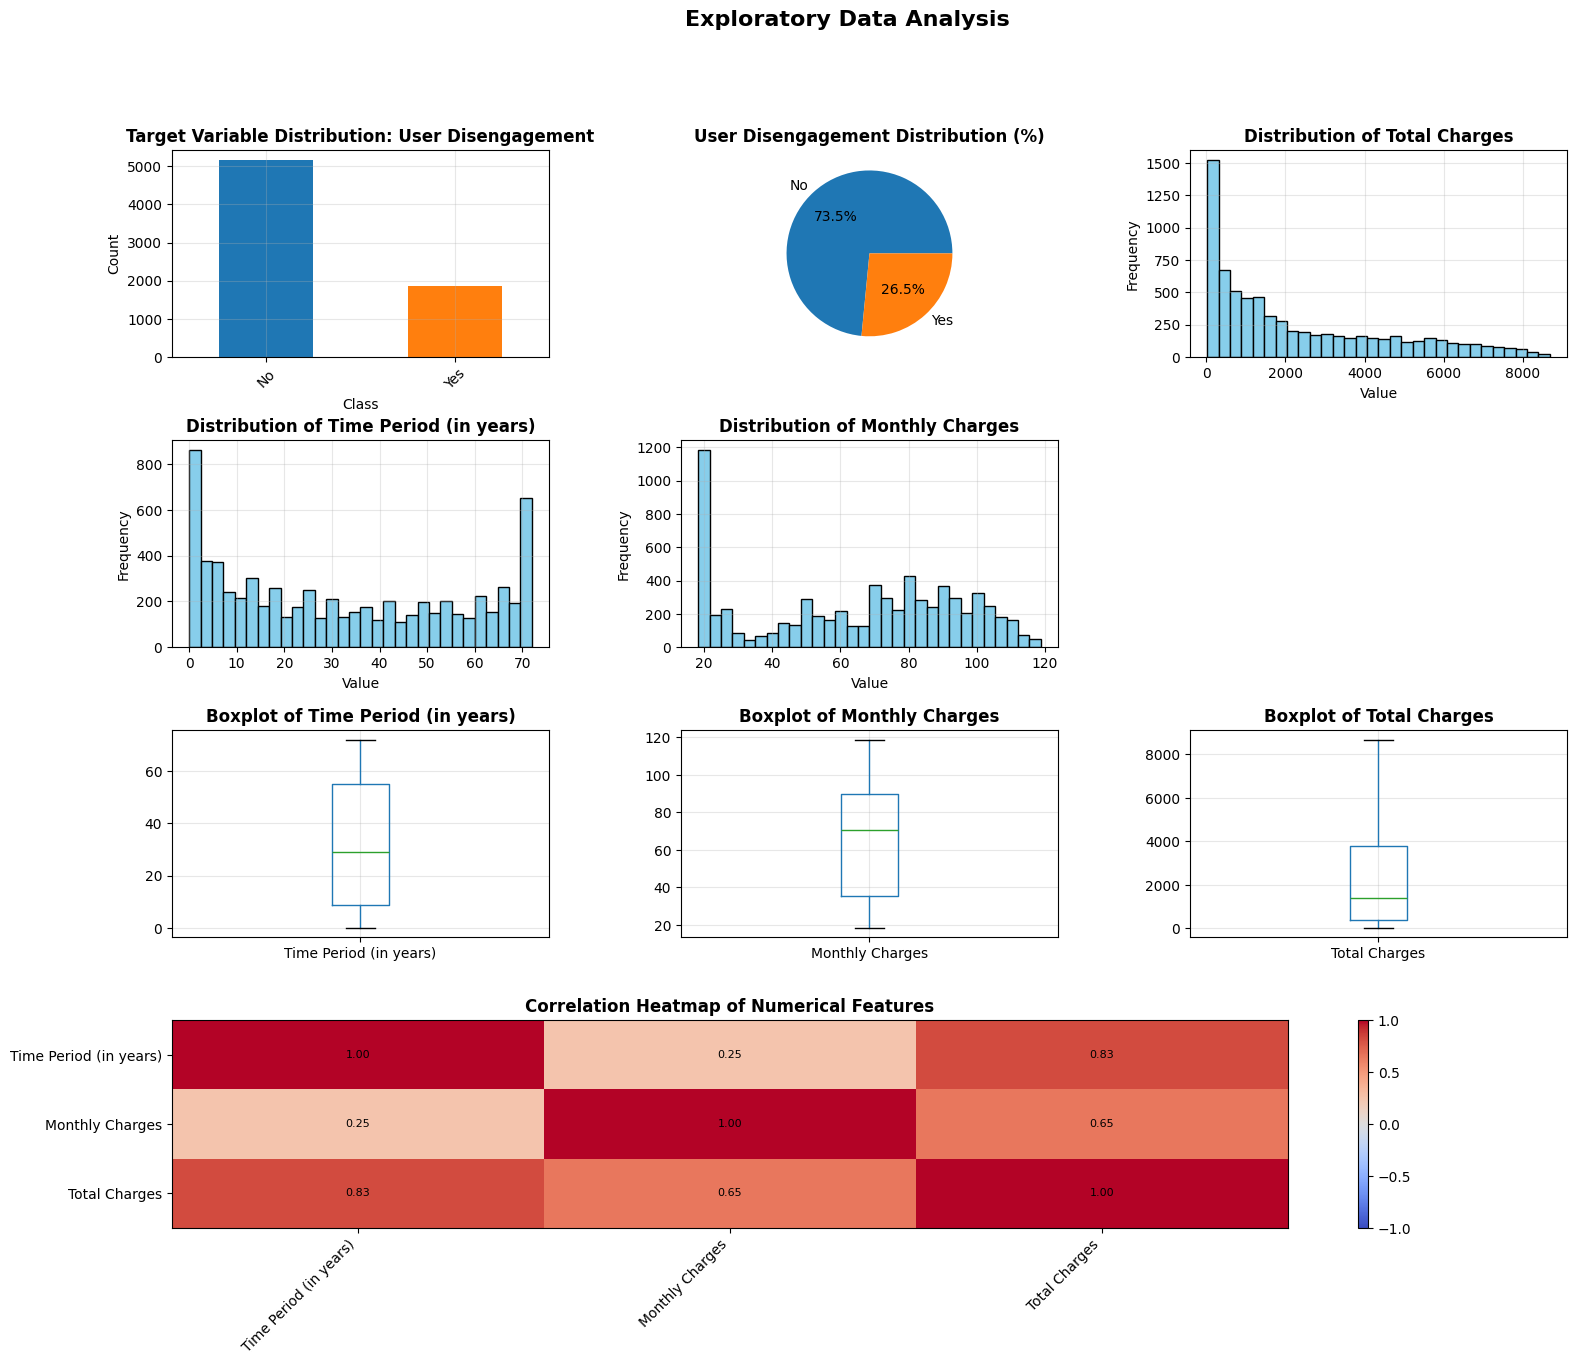

CORRELATION MATRIX
                        Time Period (in years)  Monthly Charges  Total Charges
Time Period (in years)                1.000000         0.247900       0.825464
Monthly Charges                       0.247900         1.000000       0.650864
Total Charges                         0.825464         0.650864       1.000000


HANDLING OUTLIERS


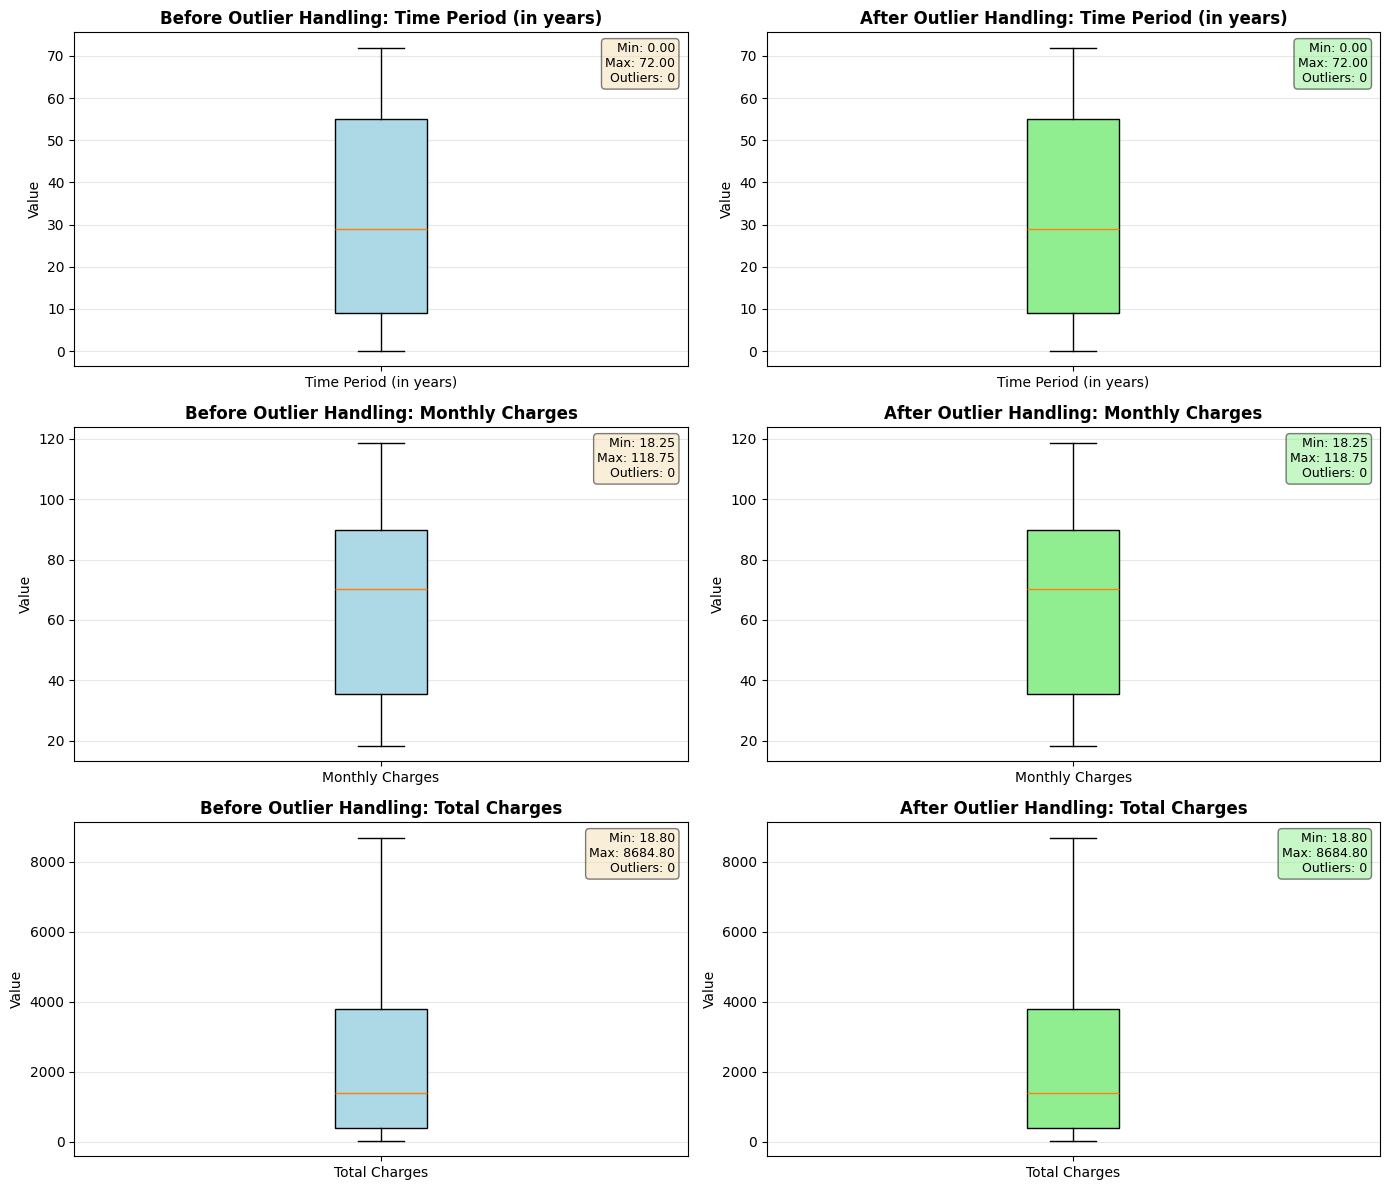

OUTLIER DETECTION AND HANDLING (IQR METHOD)

Time Period (in years):
  Data range: [0.00, 72.00]
  Mean: 32.37 | Std Dev: 24.5595
  Outliers detected: 0
  Lower bound: -60.00
  Upper bound: 124.00

Monthly Charges:
  Data range: [18.25, 118.75]
  Mean: 64.76 | Std Dev: 30.0900
  Outliers detected: 0
  Lower bound: -46.02
  Upper bound: 171.38

Total Charges:
  Data range: [18.80, 8684.80]
  Mean: 2281.92 | Std Dev: 2265.2704
  Outliers detected: 0
  Lower bound: -4674.34
  Upper bound: 8863.16

(Outliers have been capped to the bounds)


PREPROCESSING FEATURES
FEATURE PREPROCESSING
Numerical columns: ['Time Period (in years)', 'Monthly Charges', 'Total Charges']
Categorical columns: ['ID', 'Gender', 'Mobile Service', 'Internet\xa0', 'Web Security', 'Backup Service', 'Web Support', 'Contract', 'Payment Method']

Processed feature matrix shape: (7043, 7060)
Target shape: (7043,)


STRATIFIED SPLIT AND SMOTE
TRAIN-TEST SPLIT
Original dataset size: 7043
Training set size: 5634
Test set siz

In [ ]:
# YOUR CODE HERE
# Load and process the User Disengagement dataset
print("Loading User Disengagement Dataset...")
df_disengagement = load_tabular_dataset('User_Disengagement_Dataset.csv')

# Inspect the dataset
inspect_dataset(df_disengagement, 'User Disengagement')

# Impute missing values
print("\n" )
print("HANDLING MISSING VALUES")
#
df_disengagement = impute_missing_values(df_disengagement)

# Drop any remaining NaN values
print("\nDropping any remaining NaN values")
initial_rows = len(df_disengagement)
df_disengagement = df_disengagement.dropna()
final_rows = len(df_disengagement)
print(f"Rows removed: {initial_rows - final_rows}")

# Remove duplicates
print("\n" )
print("HANDLING DUPLICATE ROWS")
#
df_disengagement = remove_duplicate_rows(df_disengagement)

# Perform EDA
print("\n" )
print("PERFORMING EDA")
#
perform_eda(df_disengagement, 'User Disengagement')

# Detect and handle outliers
print("\n" )
print("HANDLING OUTLIERS")
#
numerical_cols = df_disengagement.select_dtypes(include=[np.number]).columns.tolist()
df_disengagement = detect_and_handle_outliers(df_disengagement, numerical_cols)

# Preprocess features
print("\n" )
print("PREPROCESSING FEATURES")
#
X, y = preprocess_features(df_disengagement, 'User Disengagement')

# Stratified split with SMOTE
print("\n" )
print("STRATIFIED SPLIT AND SMOTE")
#
X_train, X_test, y_train, y_test = stratified_split_with_smote(X, y, test_size=0.2, random_state=SEED)

print("\n" )
print("TABULAR DATA PROCESSING COMPLETED SUCCESSFULLY")
#

## Linear Regression

In [ ]:
def load_dataset(file_path):
    """
    Load the dataset.

    Args:
        file_path (str): Path to the dataset file.

    Returns:
        pd.DataFrame: Loaded dataset.
    """
    # YOUR CODE HERE
    df = pd.read_csv(file_path)
    return df

#dataset loaded

In [ ]:
def explore_regression_dataset(df, target_column):
    """
    Perform initial exploration of the regression dataset.

    This includes:
    - Number of samples and features
    - Number of numerical and categorical features
    - Summary statistics of the target variable

    Args:
        df (pd.DataFrame): Input dataset.
        target_column (str): Target variable name.

    Returns:
        None
    """
    # YOUR CODE HERE
    #
    print("REGRESSION DATASET EXPLORATION")
    #
    print(f"Number of samples: {len(df)}")
    print(f"Total number of features: {len(df.columns)}")

    # These are the Count numerical and categorical features
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print(f"Number of numerical features: {len(numerical_cols)}")
    print(f"Number of categorical features: {len(categorical_cols)}")
    
    print(f"\nTarget variable: {target_column}")
    print(f"Target variable dtype: {df[target_column].dtype}")
    
    print(f"\n{'Summary Statistics of Target Variable':^60}")
    #
    print(df[target_column].describe())
    
    print("\n" )
    print("First few rows:")
    #
    print(df.head())

In [ ]:
def preprocess_regression_data(df, target_column):

    print("DATA PREPROCESSING PIPELINE")

    df_processed = df.copy()

    # total_sqft handling
    #
    def convert_sqft(val):
        if pd.isna(val):
            return np.nan
        if isinstance(val, str):
            if '-' in val:
                try:
                    a, b = val.split('-')
                    return (float(a) + float(b)) / 2
                except:
                    return np.nan
            try:
                return float(val)
            except:
                return np.nan
        return val

    if 'total_sqft' in df_processed.columns:
        df_processed['total_sqft'] = df_processed['total_sqft'].apply(convert_sqft)
        df_processed = df_processed[df_processed['total_sqft'].notnull()]

    #
    # size column handling 
    #
    if 'size' in df_processed.columns:
        df_processed['size'] = (
            df_processed['size']
            .astype(str)
            .str.extract(r'(\d+)')[0]
            .astype(float)
        )
        df_processed = df_processed[df_processed['size'].notnull()]

    #
    # availability encoding
    #
    if 'availability' in df_processed.columns:
        df_processed['availability'] = df_processed['availability'].apply(
            lambda x: 1 if x == 'Ready To Move' else 0
        )

    #
    # rare locations handling
    #
    if 'location' in df_processed.columns:
        loc_count = df_processed['location'].value_counts()
        rare_locs = loc_count[loc_count < 20].index
        df_processed.loc[
            df_processed['location'].isin(rare_locs), 'location'
        ] = 'Other'

    #
    # rare societies handling
    #
    if 'society' in df_processed.columns:
        soc_count = df_processed['society'].value_counts()
        rare_soc = soc_count[soc_count < 20].index
        df_processed.loc[
            df_processed['society'].isin(rare_soc), 'society'
        ] = 'Other'

    #
    # Missing values
    #
    num_cols = df_processed.select_dtypes(include=[np.number]).columns
    cat_cols = df_processed.select_dtypes(include=['object', 'category', 'string']).columns

    for col in num_cols:
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())

    for col in cat_cols:
        df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

    #
    # Removed duplicates
    #
    df_processed = df_processed.drop_duplicates()

    
    # Outlier handling
    
    num_cols = [c for c in num_cols if c != target_column]

    for col in num_cols:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df_processed[col] = np.clip(df_processed[col], lb, ub)

    
    # target split done
    
    y = df_processed[target_column].values
    X_df = df_processed.drop(columns=[target_column])

    
    # encoding category
    
    cat_cols = X_df.select_dtypes(include=['object', 'category', 'string']).columns
    X_df = pd.get_dummies(X_df, columns=cat_cols, drop_first=True)

    
    # completed Scaling 
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_df)

    print("Final Feature Shape:", X_scaled.shape)
    print("Target Shape:", y.shape)
    print("=" * 70)

    return X_scaled, y, X_df.columns.tolist()


Assumptions made during preprocessing:
for availability, I turned it into just a yes or no thing, where ready to move got a 1 and everything else a 0. That simplified it a lot.

Size was tricky, but I pulled out the number of rooms to treat it as a number instead of whatever it was before. (2 BHK was changed to 2)

Then there were those total sqft variables, multiple ones, so I just averaged them out and used the mean. 

For location and society, there were tons of rare categories popping up, so I collected them together as other. 

Overall, I standardized the numbers to make them comparable, and for the categories, one-hot encoding turned them into dummies. 

In [ ]:
def regression_correlation_analysis(df, target_column):
    """
    Analyze correlation between features and the target variable.

    This function should:
    - Compute correlation coefficients
    - Visualize correlations
    - Comment on multicollinearity

    Args:
        df (pd.DataFrame): Input dataset.
        target_column (str): Target variable name.

    Returns:
        None
    """
    # YOUR CODE HERE
    
    print("CORRELATION ANALYSIS")
    #
    
    # Get numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Compute correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Get correlation with target variable
    target_corr = corr_matrix[target_column].sort_values(ascending=False)
    
    print(f"\nCorrelation of features with target '{target_column}':")
    print(target_corr)
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Correlation heatmap
    ax1 = axes[0]
    im = ax1.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    ax1.set_xticks(range(len(numerical_cols)))
    ax1.set_yticks(range(len(numerical_cols)))
    ax1.set_xticklabels(numerical_cols, rotation=45, ha='right')
    ax1.set_yticklabels(numerical_cols)
    
    for i in range(len(numerical_cols)):
        for j in range(len(numerical_cols)):
            text = ax1.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontsize=9)
    
    ax1.set_title('Feature Correlation Heatmap', fontweight='bold')
    plt.colorbar(im, ax=ax1)
    
    # Target correlation barplot
    ax2 = axes[1]
    target_corr_plot = target_corr.drop(target_column)
    colors = ['green' if x > 0 else 'red' for x in target_corr_plot.values]
    ax2.barh(range(len(target_corr_plot)), target_corr_plot.values, color=colors)
    ax2.set_yticks(range(len(target_corr_plot)))
    ax2.set_yticklabels(target_corr_plot.index)
    ax2.set_xlabel('Correlation Coefficient')
    ax2.set_title(f'Feature Correlation with {target_column}', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Multicollinearity analysis
    print(f"\n{'Multicollinearity Analysis':^60}")
    #
    print("Features with high correlation (|r| > 0.8):")
    high_corr_found = False
    for i in range(len(numerical_cols)):
        for j in range(i+1, len(numerical_cols)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                print(f"  {numerical_cols[i]} <-> {numerical_cols[j]}: {corr_matrix.iloc[i, j]:.3f}")
                high_corr_found = True
    
    if not high_corr_found:
        print("  No highly correlated features found")
        

Correlation analysis reveals that certain numerical variables have a moderate
correlation with house price. There is no strong multicollinearity among the
numerical variables.

In [ ]:

def split_regression_data(X, y, test_size=0.3, random_state=42):
    """
    Split regression data into training and testing sets.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target values.
        test_size (float): Fraction used for testing.
        random_state (int): Random seed.

    Returns:
        X_train, X_test, y_train, y_test
    """
    # YOUR CODE HERE
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )
    
    #
    print("TRAIN-TEST SPLIT")
    #
    print(f"Total samples: {len(X)}")
    print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    
    return X_train, X_test, y_train, y_test

In [ ]:
def train_linear_regression_model(X_train, y_train):
    """
    Train a linear regression model.

    The model may be trained using:
    - Closed-form solution, or
    - A standard machine learning library.

    Args:
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training targets.

    Returns:
        model: Trained linear regression model.
    """
    # YOUR CODE HERE
    from sklearn.linear_model import LinearRegression
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #
    print("LINEAR REGRESSION MODEL TRAINING")
    #
    print(f"Model: LinearRegression")
    print(f"Training samples: {len(X_train)}")
    print(f"Number of features: {X_train.shape[1]}")
    print(f"Model intercept: {model.intercept_:.4f}")
    print(f"Number of coefficients: {len(model.coef_)}")
    
    return model

In [ ]:
def evaluate_linear_regression(model, X_test, y_test):
    """
    Evaluate the trained linear regression model.

    This function should compute:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - R^2 score

    Args:
        model: Trained regression model.
        X_test (np.ndarray): Test features.
        y_test (np.ndarray): Test targets.

    Returns:
        None
    """
    # YOUR CODE HERE
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\n")
    print("LINEAR REGRESSION MODEL EVALUATION")
    #
    print(f"Test set size: {len(y_test)}")
    print(f"\nPerformance Metrics:")
    print(f"  Mean Squared Error (MSE):  {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Actual vs Predicted
    ax1 = axes[0]
    ax1.scatter(y_test, y_pred, alpha=0.6, s=30)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title('Actual vs Predicted Values', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Residuals
    residuals = y_test - y_pred
    ax2 = axes[1]
    ax2.scatter(y_pred, residuals, alpha=0.6, s=30)
    ax2.axhline(y=0, color='r', linestyle='--', lw=2)
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')
    ax2.set_title('Residual Plot', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [ ]:
def interpret_linear_model_coefficients(model, feature_names):
    """
    Interpret coefficients of the linear regression model.

    Args:
        model: Trained linear regression model.
        feature_names (list): Names of input features.

    Returns:
        None
    """
    # YOUR CODE HERE
    print("\n" )
    print("MODEL COEFFICIENT INTERPRETATION")
    #
    
    coefficients = model.coef_
    intercept = model.intercept_
    
    print(f"\nIntercept: {intercept:.4f}")
    print(f"\nTop 10 Most Important Coefficients (by absolute value):")
    #
    
    # Get indices sorted by absolute value
    coef_indices = np.argsort(np.abs(coefficients))[::-1]
    
    # Print top 10 (or fewer if less than 10 features)
    n_features_to_show = min(10, len(coefficients))
    
    for i in range(n_features_to_show):
        idx = coef_indices[i]
        coef_value = coefficients[idx]
        feature_name = f"Feature_{idx}" if idx >= len(feature_names) else feature_names[idx]
        impact = "Positive" if coef_value > 0 else "Negative"
        print(f"{i+1:2d}. {feature_name:40s} | Coefficient: {coef_value:10.4f} | {impact}")
    
    print("\n" )
    print("INTERPRETATION SUMMARY")
    #
    print("Positive coefficients: Features increase the target variable")
    print("Negative coefficients: Features decrease the target variable")
    print("Larger absolute values: Features have stronger influence")




LINEAR REGRESSION MODEL - HOUSE PRICE PREDICTION

1. DATASET EXPLORATION
REGRESSION DATASET EXPLORATION
Number of samples: 13320
Total number of features: 9
Number of numerical features: 3
Number of categorical features: 6

Target variable: price
Target variable dtype: float64

           Summary Statistics of Target Variable            
count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


First few rows:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move  

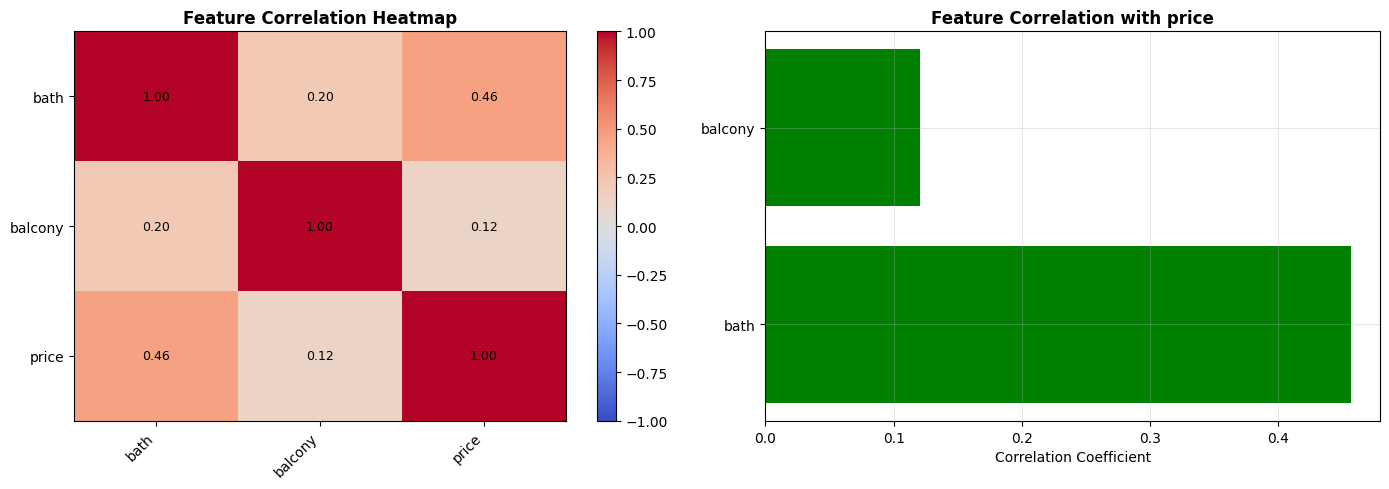


                 Multicollinearity Analysis                 
Features with high correlation (|r| > 0.8):
  No highly correlated features found

3. DATA PREPROCESSING
DATA PREPROCESSING PIPELINE
Final Feature Shape: (12506, 206)
Target Shape: (12506,)

4. TRAIN-TEST SPLIT
TRAIN-TEST SPLIT
Total samples: 12506
Training set size: 10004 (80.0%)
Test set size: 2502 (20.0%)

5. MODEL TRAINING
LINEAR REGRESSION MODEL TRAINING
Model: LinearRegression
Training samples: 10004
Number of features: 206
Model intercept: 115.1729
Number of coefficients: 206

6. MODEL EVALUATION


LINEAR REGRESSION MODEL EVALUATION
Test set size: 2502

Performance Metrics:
  Mean Squared Error (MSE):  11203.9736
  Root Mean Squared Error (RMSE): 105.8488
  Mean Absolute Error (MAE): 47.6301
  R² Score: 0.4404


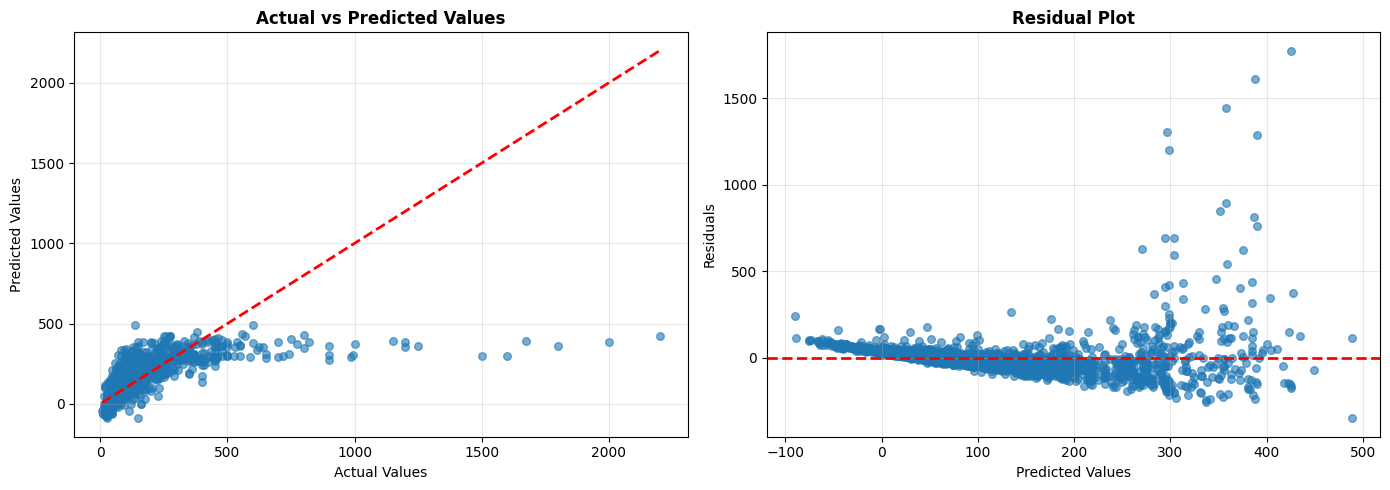


7. MODEL INTERPRETATION


MODEL COEFFICIENT INTERPRETATION

Intercept: 115.1729

Top 10 Most Important Coefficients (by absolute value):
 1. Feature_2                                | Coefficient:    76.6309 | Positive
 2. Feature_6                                | Coefficient:    32.2560 | Positive
 3. Feature_175                              | Coefficient:   -17.6789 | Negative
 4. Feature_3                                | Coefficient:    17.5301 | Positive
 5. Feature_111                              | Coefficient:    12.7353 | Positive
 6. Feature_126                              | Coefficient:    11.8605 | Positive
 7. Feature_1                                | Coefficient:    -8.8797 | Negative
 8. Feature_141                              | Coefficient:    -6.7795 | Negative
 9. Feature_84                               | Coefficient:    -6.0259 | Negative
10. Feature_80                               | Coefficient:     5.9635 | Positive


INTERPRETATION SUMMARY
Positive coeffici

In [ ]:
# Linear Regression Pipeline Execution
print("\n\n")
#
print("LINEAR REGRESSION MODEL - HOUSE PRICE PREDICTION")
#

# Load the House Price dataset
df_house = load_dataset('House_Price_Dataset.csv')

# Explore the dataset
print("\n1. DATASET EXPLORATION")
#
explore_regression_dataset(df_house, 'price')

# Perform correlation analysis
print("\n2. CORRELATION ANALYSIS")
#
regression_correlation_analysis(df_house, 'price')

# Preprocess the data
print("\n3. DATA PREPROCESSING")
#
X_reg, y_reg, feature_names = preprocess_regression_data(df_house, 'price')


# Split the data
print("\n4. TRAIN-TEST SPLIT")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = split_regression_data(
    X_reg, y_reg, test_size=0.2, random_state=SEED
)

# Train the model
print("\n5. MODEL TRAINING")

lr_model = train_linear_regression_model(X_train_reg, y_train_reg)

# Evaluate the model
print("\n6. MODEL EVALUATION")

evaluate_linear_regression(lr_model, X_test_reg, y_test_reg)

# Interpret coefficients
print("\n7. MODEL INTERPRETATION")

feature_names = [f"Feature_{i}" for i in range(X_reg.shape[1])]
interpret_linear_model_coefficients(lr_model, feature_names)


print("linear regression pipeline was succesully done")
